# Things I had to do in the terminal before being able to use this notebook


## Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

## go into env
conda activate ox

## install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

## makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

## other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gd
%matplotlib inline

In [2]:

place_name = " Bockhorn, Landkreis Friesland, Niedersachsen, 26345, Germany"


In [3]:
gd.tools.geocode(place_name, provider='nominatim', user_agent="my-application")

,geometry,address
0,POINT (8.01612 53.39165),"Bockhorn, Landkreis Friesland, Niedersachsen, ..."


In [4]:
# Specify the name that is used to seach for the data


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)


In [5]:
edges = ox.graph_to_gdfs(graph, nodes=False)
streets = edges[['access','geometry']].copy() # saving without this caused problems 
print(streets)
streets.to_file('Streets_'+place_name.split(',')[0].replace(' ','_')+'_MA_'+str(12).replace('.','_')+'.geojson', driver='GeoJSON')

       access                                           geometry
0         NaN  LINESTRING (7.98205 53.35854, 7.98216 53.35829...
1         NaN  LINESTRING (7.98205 53.35854, 7.98201 53.35862...
2         NaN  LINESTRING (7.98205 53.35854, 7.98275 53.35852...
3         NaN  LINESTRING (8.00043 53.36539, 8.00029 53.36535...
4         NaN  LINESTRING (8.00043 53.36539, 8.00014 53.36512...
...       ...                                                ...
4005      NaN    LINESTRING (8.02422 53.40028, 8.02413 53.40026)
4006      NaN  LINESTRING (8.00771 53.39046, 8.00780 53.39074...
4007      NaN    LINESTRING (8.02461 53.40032, 8.02472 53.40019)
4008  private    LINESTRING (8.03389 53.41083, 8.03363 53.41071)
4009  private  LINESTRING (8.03231 53.41105, 8.03246 53.41096...

[4010 rows x 2 columns]


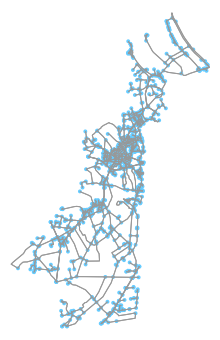

In [6]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [7]:
buildings_of_interest = ['clinic',
                         'doctors',
                         'nursing_home',
                         'pharmacy',
                         'social_facility',
                         'hospital',
                         'school',
                         'kindergarten',
                         'university',
                         'library',
                         'marketplace']
#get all the interesting amenity in the place of interest. !!BEWARE!! not all buildings have amenity so supermarket is separate query
bois = ox.pois_from_place(place_name, amenities=buildings_of_interest)

In [22]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(place_name)
#bos = buildings[buildings['amenity'].isin(buildings_of_interest)]
#separation to get all shops for nicer visualization
shop = buildings[buildings['shop'].notnull()]


In [9]:
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['car_wash', 'shelter', 'doctors', 'pub', 'place_of_worship', 'social_facility', 'police']
shop = ['doityourself', 'farm', 'supermarket', 'furniture', 'bakery', 'butcher']
building = ['yes', 'farm', 'greenhouse', 'house', 'hut', 'commercial', 'garage', 'detached', 'silo', 'cabin', 'roof', 'apartments', 'carport', 'supermarket', 'retail', 'residential', 'industrial', 'farm_auxiliary', 'stable', 'garages', 'barn', 'service', 'shed', 'semidetached_house', 'hotel']
office = ['company']
['amenity', 'shop', 'building', 'office']


In [10]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(place_name)
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets
nodes, edges = ox.graph_to_gdfs(graph)


In [11]:
#extra just for hospitals for nicer visulisation
healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
boish = ox.pois_from_place(place_name, amenities=healthcare)
#boisr = ox.pois_from_place(place_name, shop=)

In [51]:

buildings2=gd.read_file('Buildings_Bockhorn_MA_2.geojson')
buildings2.building.value_counts()
list_cols=[]
for x in col_names:
    try:
        blup = buildings2[buildings2[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        list_cols.append(x)
    except:
        continue
print(list_cols)
loc_class_dic = assign_location_classifier(buildings2)
buildings2['building_type']= buildings2.apply(lambda row: assign_building_type(row[list_cols].dropna().unique(), loc_class_dic), axis = 1) 


['amenity', 'shop', 'building']


In [52]:
print(buildings2.building_type.value_counts())
buildings2

home                  1517
work                   167
excluded_buildings      87
public                  13
Name: building_type, dtype: int64


,building,amenity,shop,building:levels,name,building_coordinates_x,building_coordinates_y,building_area,neighbourhood,geometry,leisure,sport,building_type
0,yes,None,None,None,None,8.017194,53.387697,1.176376e-06,0,"POLYGON ((8.01744 53.38831, 8.01700 53.38825, ...",NaN,NaN,home
1,yes,None,None,None,None,8.011844,53.386229,9.074092e-08,0,"POLYGON ((8.01165 53.38636, 8.01162 53.38621, ...",NaN,NaN,home
2,yes,None,None,None,None,8.009535,53.385883,5.613000e-08,0,"POLYGON ((8.00973 53.38597, 8.00952 53.38574, ...",NaN,NaN,home
3,yes,car_wash,None,None,None,8.008604,53.385328,2.102091e-08,0,"POLYGON ((8.00851 53.38539, 8.00851 53.38527, ...",NaN,NaN,public
4,yes,None,None,None,None,8.010576,53.386227,8.572810e-08,0,"POLYGON ((8.01082 53.38634, 8.01073 53.38616, ...",NaN,NaN,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,yes,None,None,None,None,8.018975,53.398717,2.964814e-08,0,"MULTIPOLYGON (((8.01885 53.39873, 8.01897 53.3...",NaN,NaN,home
1780,yes,None,None,None,None,8.023547,53.395200,3.603083e-08,0,"MULTIPOLYGON (((8.02340 53.39521, 8.02365 53.3...",NaN,NaN,home
1781,yes,None,None,None,None,8.018676,53.402174,2.696294e-08,0,"MULTIPOLYGON (((8.01866 53.40215, 8.01868 53.4...",NaN,NaN,home
1782,yes,None,None,None,None,8.030601,53.402154,4.061965e-08,0,"MULTIPOLYGON (((8.03068 53.40214, 8.03086 53.4...",NaN,NaN,home


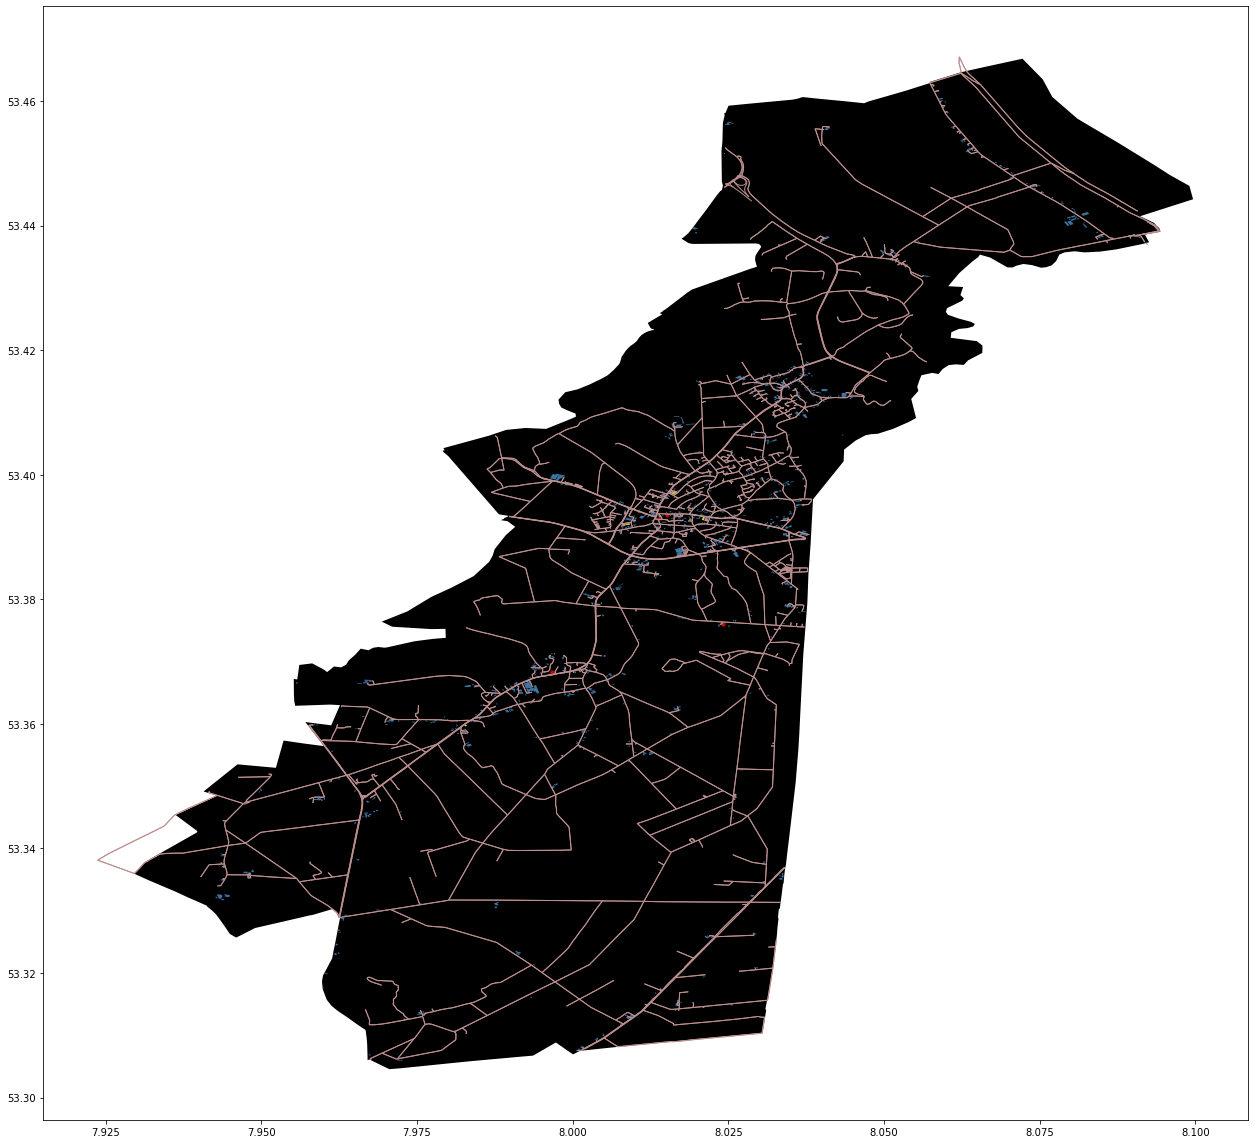

In [18]:
fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
buildings.plot(ax=ax, facecolor='steelblue', alpha=0.9)
shop.plot(ax=ax, facecolor='yellow', alpha=0.7)

# Plot healthcare
boish.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()


In [ ]:
boish

In [ ]:
#shop

In [ ]:
#buildings_test = ox.footprints_from_place(place_name)

In [ ]:
def location_interpreter(df):
    healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
    buildings_entry_possible = list(df['shop'].unique())\
                          +['parking', 'kindergarten', 'garages', 'cinema',
                            'retail', 'supermarket', 'commercial', 'chapel',
                            'church', 'university', 'school', 'hospital', 
                            'industrial', 'office', 'dormitory', 'greenhouse', 
                            'garage', 'gym', 'electricity', 'detached', 
                            'sports_hall', 'civic', 'shed', 'stable', 
                            'public', 'hotel', 'grandstand', 'bridge',
                            'construction', 'public_building']\
                           +list(df['leisure'].unique())\
                           +list(df['sport'].unique())\
                           +list(df['office'].unique())
    
    col_names=['amenity','shop']
    
    m1 = df.amenity.isin(healthcare)
    df['overcategory'] = df.amenity.where(-m1, 'healthcare')
    
    m2 = df.amenity.isin(buildings_entry_possible)
    df['overcategory'] = df.amenity.where(-m2, 'walk_in')
    
    m3 = df['overcategory'].isin(['walk_in','healthcare'])
        #print(m3)
    df['overcategory'] = df.amenity.where(m3, 'residential')
    
    return df


In [ ]:
#testb = buildings_test
#test = location_interpreter(testb)
#test.loc[test['overcategory'] == 'walk_in']

In [ ]:
#df = testb
#buildings_entry_possible = list(df['shop'].unique())\
#                          +['parking', 'kindergarten', 'garages', 'cinema',
#                            'retail', 'supermarket', 'commercial', 'chapel',
#                            'church', 'university', 'school', 'hospital', 
#                            'industrial', 'office', 'dormitory', 'greenhouse', 
#                            'garage', 'gym', 'electricity', 'detached', 
 #                           'sports_hall', 'civic', 'shed', 'stable', 
 #                           'public', 'hotel', 'grandstand', 'bridge',
 #                           'construction', 'public_building']\
 #                          +list(df['leisure'].unique())\
 #                          +list(df['sport'].unique())\
 #                          +list(df['office'].unique())

#m2 = df.amenity.isin(buildings_entry_possible)
#df['overcategory'] = df.amenity.where(-m2, 'walk_in')
#df['overcategory']

In [ ]:
ox.pd.set_option('display.max_rows', None)


In [ ]:
buildings

In [ ]:
#buildings
bois

In [ ]:
#idea check to see if ox.pois_from_place(place_name, amenities=buildings_of_interest) and ox.footprints_from_place(place_name) 
#do the same not finished but they are not, for Wedding!
bos = buildings[buildings['building'].isin(['construction'])]
bos

In [ ]:
#shop = buildings[buildings.shop.notnull()]
#shop['shop'].unique()


In [41]:
def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['detached', 'garage', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                df_buildings[col] = [np.nan]*len(df_buildings)


        loc_class_dic['work'] = ['industrial', 'stable','service', 'greenhouse', 'cowshed', 'commercial', 'warehouse', 'office', 'farm',\
                                 'fire_station', 'farm_auxiliary', 'retail','company']\
            + list(df_buildings['amenity'].unique())\
            + list(df_buildings['shop'].unique())

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['public','police','car_wash', 'chapel','place_of_worship', 'hotel', 'church', 'parish_hall', 'townhall','supermarket',\
                                   'grocery_store', 'pub', 'sports_centre','doctors',  'social_facility']\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

In [28]:
loc_class_dic = assign_location_classifier(buildings)
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[col_names].dropna().unique(), loc_class_dic), axis = 1) 

In [34]:
buildings['building_type'].value_counts()

home                  3467
excluded_buildings     875
work                   208
public                  17
Name: building_type, dtype: int64

In [ ]:
import matplotlib.cm as cm 

In [ ]:
locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}
plotrange=0.02
neighbourhood = 3
print()


fig, ax = plt.subplots(figsize=(25,10))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
edges.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=False,legend_kwds={'frameon':False, 'loc':'lower right'})
    #ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    #ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    #ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
plt.legend()
plt.title(place_name)
plt.savefig(place_name+'_location_type_map.png', dpi=600)
#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)

In [ ]:
#start of different idea to access OpenStreetMap and retrive data
#aĺlows to make own queries with more variables than ameniety so longterm better solution
from OSMPythonTools.nominatim import Nominatim
#get area data by area name. very convenient
nominatim = Nominatim()
#get area data here id by area name
areaId = nominatim.query('Berlin, Germany').areaId()
areaId

In [ ]:
#here the query for the buildings will happen
import time

from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
buildings_of_interest_dic = {'clinic':'amenity',
                         'doctors':'amenity',
                         'nursing_home':'amenity',
                         'pharmacy':'amenity',
                         'social_facility':'amenity',
                         'hospital':'amenity',
                         'school':'amenity',
                         'kindergarten':'amenity',
                         'university':'amenity',
                         'library':'amenity',
                         'marketplace':'amenity'}
#overpass is the nicest api to use, at least there were examples for this tool
overpass = Overpass()
#query to api, saddly right now only one selector possible but idea is to loop or find help
results = {}
for key in buildings_of_interest_dic.keys():
    selc = '"' + str(buildings_of_interest_dic[key]) + '"="' + str(key) + '"'
    query = overpassQueryBuilder(area=areaId, elementType=['node','way', 'relation'], selector=selc, includeGeometry=True)
#saves data as some kind of formated list
    result = overpass.query(query)
    #time.sleep(23)
    results[key] = result

In [ ]:
len(buildings_of_interest_dic)

In [ ]:
import geopandas as gpd
#in result.elements list of the actual things. to my understanding in GeoJson format hope is that geopanda can use them
results['clinic'].elements()[1]